# Relative feature tightness of fragments using part 0 for test data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [2]:
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)

In [3]:
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)

In [4]:
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)


In [5]:
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)


In [6]:
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)


In [7]:
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)


In [8]:
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)


In [9]:
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)


In [10]:
profile1.add_another_cooccurrence_profile(profile2)
profile1.add_another_cooccurrence_profile(profile3)
profile1.add_another_cooccurrence_profile(profile4)
profile1.add_another_cooccurrence_profile(profile5)
profile1.add_another_cooccurrence_profile(profile6)
profile1.add_another_cooccurrence_profile(profile7)
profile1.add_another_cooccurrence_profile(profile8)
profile1.add_another_cooccurrence_profile(profile9)
profile1.df

value
feature1                                           feature2                                                 
[CH2][CH2][CH2][C]([CH])([CH])[CH3]                [CH2][CH2][CH2][C]([CH])([CH])[CH3]                   844
                                                   [CH2][CH2][C]([CH3])([C](=[O])[OH])[CH]([CH2])[C]      81
                                                   [CH2][CH2][O][CH]([CH])[O]                              4
                                                   [CH2][CH]([CH])[O][CH]([CH])[O]                        30
                                                   [CH2][CH]([O])[CH]([OH])[CH]([CH])[OH]                 23
...                                                                                                      ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                      1

[17413530 rows x 1 columns]

In [11]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile1)
probability_profile.df

value
feature1                                           feature2                                                    
[CH2][CH2][CH2][C]([CH])([CH])[CH3]                [CH2][CH2][CH2][C]([CH])([CH])[CH3]                 0.002428
                                                   [CH2][CH2][C]([CH3])([C](=[O])[OH])[CH]([CH2])[C]   0.000233
                                                   [CH2][CH2][O][CH]([CH])[O]                          0.000012
                                                   [CH2][CH]([CH])[O][CH]([CH])[O]                     0.000086
                                                   [CH2][CH]([O])[CH]([OH])[CH]([CH])[OH]              0.000066
...                                                                                                         ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                  0.000003

[17413530 rows x 1 columns]

In [12]:
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [13]:
reference_profile1.add_another_cooccurrence_profile(reference_profile2)
reference_profile1.add_another_cooccurrence_profile(reference_profile3)
reference_profile1.add_another_cooccurrence_profile(reference_profile4)
reference_profile1.add_another_cooccurrence_profile(reference_profile5)
reference_profile1.add_another_cooccurrence_profile(reference_profile6)
reference_profile1.add_another_cooccurrence_profile(reference_profile7)
reference_profile1.add_another_cooccurrence_profile(reference_profile8)
reference_profile1.add_another_cooccurrence_profile(reference_profile9)
reference_profile1.df

value
feature1                           feature2                                      
[C][NH][c]([s][c])[c]([C])[c]      [C][NH][c]([s][c])[c]([C])[c]             3025
                                   [C][O][CH2][CH3]                          1441
                                   [C][c]([cH])[c]([n][c])[n]([c])[n]          34
                                   [C][c]([c])[cH][n][n]                       42
                                   [C][c]([c])[c]([CH2][CH2])[c]([CH2])[s]   1984
...                                                                           ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]            1
                                   [C][CH]([CH2])[NH][CH2][S]                   1
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                   1
                                   [C][CH]([NH])[CH2][CH2][S]                   1
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                   1

[13096371 rows x 1 columns]

In [14]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile1)
reference_probability_profile.df

value
feature1                           feature2                                         
[C][NH][c]([s][c])[c]([C])[c]      [C][NH][c]([s][c])[c]([C])[c]            0.008868
                                   [C][O][CH2][CH3]                         0.004224
                                   [C][c]([cH])[c]([n][c])[n]([c])[n]       0.000100
                                   [C][c]([c])[cH][n][n]                    0.000123
                                   [C][c]([c])[c]([CH2][CH2])[c]([CH2])[s]  0.005816
...                                                                              ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]        0.000003
                                   [C][CH]([CH2])[NH][CH2][S]               0.000003
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]               0.000003
                                   [C][CH]([NH])[CH2][CH2][S]               0.000003
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]               0.000003

[13096371 rows x 1 columns]

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [15]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                            feature2                                                   
[CH2][CH2][CH2][C]([CH])([CH])[CH3] [CH2][CH2][CH2][C]([CH])([CH])[CH3]                5.993190
                                    [CH2][CH2][C]([CH3])([C](=[O])[OH])[CH]([CH2])[C]  6.312385
                                    [CH2][CH2][O][CH]([CH])[O]                         1.972535
                                    [CH2][CH]([CH])[O][CH]([CH])[O]                    4.879426
                                    [CH2][CH]([O])[CH]([OH])[CH]([CH])[OH]             4.496097
...                                                                                         ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O]  [CH][NH][CH2][S]([CH2])(=[O])=[O]                 -0.027473
                                    [C][CH]([CH2])[NH][CH2][S]                        -0.027473
[CH][NH][CH2][S]([CH2])(=[O])=[O]   [C][CH]([CH2])[NH][CH2][S]                        -0.027473
                                    [C][CH]([NH])[CH2][CH2][S]                        -0.027473
[C][CH]([CH2])[NH][CH2][S]          [C][CH]([NH])[CH2][CH2][S]                        -0.027473

[28974557 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [16]:
coconut_samples = pd.read_csv('../data/CPF/COCONUT/COCOrandomF.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'
coconut_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","'[CH][CH2][CH2][C]([CH])=[O]', '[CH][CH2][C](=..."
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","'[c][c]([CH2])[cH][c]([c])[c]', '[cH][cH][cH][..."
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","'[c][c]([c])[O][CH3]', '[c][cH][cH][c]([c])[c]..."
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","'[CH2][C]([CH2])=[CH][CH]([CH])[O]', '[C][C](=..."
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","'[cH][cH][cH][cH][cH]', '[c][CH2][CH2][NH][C]'..."
...,...,...,...,...,...,...,...,...,...
386292,COC(=O)C1=COC(OC2OC(COC(=O)c3ccc(O)c(OC)c3)C(O...,554.163556,-0.63720,LIVSNGMPJUCRLO-UHFFFAOYSA-N,LIVSNGMPJUCRLO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 80, 145, 147, 167, 231, 233, 249, 314, 42...","'[CH]=[C]([CH])[C](=[O])[O][CH3]', '[CH2][CH](..."
386293,Cc1c(CCC(=O)NCC(=O)NCC(=O)[O-])c(=O)oc2cc(O)c(...,395.065152,-0.62468,SSZVGMXOKPZNCV-UHFFFAOYSA-M,SSZVGMXOKPZNCV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 252, 254, 305, 314, 366, 406, 42...","'[NH][CH2][C](=[O])[O-]', '[c][cH][c]([Cl])[c]..."
386294,CC(=O)Oc1c(C)cc2c(c1O)C(=O)C(C1=CC(=O)c3cc(C)c...,490.089997,2.87624,JODPOMYHTFZNTK-UHFFFAOYSA-N,JODPOMYHTFZNTK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 39, 84, 202, 224, 314, 333, 352, 516, 641...","'[c][cH][c]([CH3])[c]([c])[O]', '[C][C](=[CH])..."
386295,C[N+]([O-])=NCOC1OC(CO)C(O)C(OC2OC(COC3OC(CO)C...,576.201398,-6.99890,STHHNNUYQQUJGY-UHFFFAOYSA-N,STHHNNUYQQUJGY,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 80, 170, 222, 349, 443, 489, 588, 610, 65...","'[CH2][CH]([CH])[O][CH]([CH])[O]', '[CH][O][CH..."


In [17]:
df_split_coco = np.array_split(coconut_samples, 10)

In [18]:
df_split_coco[0]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","'[CH][CH2][CH2][C]([CH])=[O]', '[CH][CH2][C](=..."
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","'[c][c]([CH2])[cH][c]([c])[c]', '[cH][cH][cH][..."
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","'[c][c]([c])[O][CH3]', '[c][cH][cH][c]([c])[c]..."
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","'[CH2][C]([CH2])=[CH][CH]([CH])[O]', '[C][C](=..."
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","'[cH][cH][cH][cH][cH]', '[c][CH2][CH2][NH][C]'..."
...,...,...,...,...,...,...,...,...,...
38625,COc1cc(C2OC3(c4cc(OC)c5c(c4)OCO5)OC3(C)C2C)cc2...,414.131468,3.51050,CVGWCATWCAZNFN-UHFFFAOYSA-N,CVGWCATWCAZNFN,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[117, 227, 230, 249, 441, 551, 556, 656, 695, ...",'[cH][c]([cH])[C]1([O][CH])[O][C]1([CH3])[CH]'...
38626,O=C(OCC1OC(Oc2c(C(=O)O)ccc(O)c2O)C(O)C(O)C1O)c...,484.085305,-1.04380,MANZFHVJGHCTOA-UHFFFAOYSA-N,MANZFHVJGHCTOA,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 67, 80, 125, 145, 147, 202, 233, 333, 389...","'[C][c]([c])[cH][cH][c]', '[CH2][CH]([CH])[O][..."
38627,COc1cc(O)c2oc(=O)ccc2c1,192.042259,1.50720,FWYIBGHGBOVPNL-UHFFFAOYSA-N,FWYIBGHGBOVPNL,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 203, 239, 314, 322, 650, 656, 695, 745, ...","'[cH][c](=[O])[o][c]([c])[c]', '[c][cH][c]([cH..."
38628,Cc1cc(O)cc(O)c1C(=O)OC1CC2(C)C3C(C=C(CO)C12O)C...,418.199153,2.02822,SWVWDNGFQHDELB-UHFFFAOYSA-N,SWVWDNGFQHDELB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 145, 167, 222, 249, 279, 384, 432, 482, 5...","'[c][C](=[O])[O][CH]([CH2])[C]', '[CH]=[C]([CH..."


In [19]:
zinc_samples = pd.read_csv('../data/CPF/ZINC/ZINCrandomF.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)
zinc_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,Cc1ccc(-n2c(=O)c3c(n4c(SCCc5ccccc5)nnc24)-c2cc...,532.229683,6.94842,DPUIXUVMXJXCJR-UHFFFAOYSA-N,DPUIXUVMXJXCJR,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 58, 74, 80, 105, 116, 153, 233, 235, 289, ...","'[cH][cH][c]([CH3])[cH][cH]', '[c]-[n]([c])[c]..."
1,Cc1ccc(-n2c(COc3ccccc3)nnc2SCC(=O)Nc2ccc3c(c2)...,488.151826,4.65672,HVIYVAXZIXJRQC-UHFFFAOYSA-N,HVIYVAXZIXJRQC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 58, 80, 102, 116, 127, 184, 191, 233, 235...","'[cH][cH][c]([CH3])[cH][cH]', '[c][n][n][c]([C..."
2,COCCNS(=O)(=O)c1ccc(OCC(=O)N2CCC(C(N)=O)CC2)c(...,433.107434,0.36740,RAILYSNQBZZKMQ-UHFFFAOYSA-N,RAILYSNQBZZKMQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 80, 94, 111, 140, 198, 222, 279, 317, 319...","'[O][CH2][CH2][NH][S]', '[C][CH]([CH2])[CH2][C..."
3,Cc1ccc(S(=O)(=O)n2nc(NCc3cccc(Br)c3)nc2NCc2ccc...,588.978270,5.57272,FFUQFTXMHIMSHO-UHFFFAOYSA-N,FFUQFTXMHIMSHO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 82, 92, 157, 235, 255, 319, 350, 374, 378...","'[cH][c]([CH2])[cH][c]([cH])[Br]', '[cH][cH][c..."
4,CCn1c(-c2ccccc2)c(C)s/c1=N\C(=O)c1ccccc1Br,400.024496,5.04852,GMWZBJMZXGQSQF-VZCXRCSSSA-N,GMWZBJMZXGQSQF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[30, 34, 57, 80, 162, 289, 294, 308, 313, 351,...",'[cH][c]([cH])-[c]([c]([CH3])[s])[n]([c])[CH2]...
...,...,...,...,...,...,...,...,...,...
379007,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(OCC)c(OC)c3)c(...,478.156243,3.20560,NKVUPLXRBGDCKZ-FQWPPLDYSA-N,NKVUPLXRBGDCKZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 94, 125, 145, 147, 162, 237, 249, 281...","'[c][c]([cH])[O][CH3]', '[CH][c]([cH])[cH][c](..."
379008,CCCCOc1ccc(-c2nn(-c3ccccc3)cc2CNC(=O)c2ccc(OCC...,501.242770,6.57610,GRVSBYRYFLOHAZ-UHFFFAOYSA-N,GRVSBYRYFLOHAZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 76, 80, 94, 102, 197, 255, 265, 294, 322,...","'[C][NH][CH2][c]([c])[cH]', '[CH3][CH2][CH2][C..."
379009,CNc1cc([C@H]2CCCN(Cc3cccc(C)c3)C2)nc(-c2cccnc2)n1,373.226646,4.26832,WGJHTUZEMVLXOF-FQEVSTJZSA-N,WGJHTUZEMVLXOF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 105, 257, 378, 437, 446, 736, 739, 744, 7...","'[c][cH][c]([n][c])[CH]([CH2])[CH2]', '[CH][CH..."
379010,COc1ccc(C23CC4CC(CC(C4)C2)C3)cc1C(=O)NC(c1cccc...,451.251129,6.68240,GUGKIBFTNCSUKM-UHFFFAOYSA-N,GUGKIBFTNCSUKM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 46, 94, 117, 235, 249, 389, 484, 486, 556,...","'[c][CH]([NH])[c]([cH][cH])[cH][cH]', '[c][C](..."


In [20]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[0]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,Cc1ccc(-n2c(=O)c3c(n4c(SCCc5ccccc5)nnc24)-c2cc...,532.229683,6.94842,DPUIXUVMXJXCJR-UHFFFAOYSA-N,DPUIXUVMXJXCJR,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 58, 74, 80, 105, 116, 153, 233, 235, 289, ...","'[cH][cH][c]([CH3])[cH][cH]', '[c]-[n]([c])[c]..."
1,Cc1ccc(-n2c(COc3ccccc3)nnc2SCC(=O)Nc2ccc3c(c2)...,488.151826,4.65672,HVIYVAXZIXJRQC-UHFFFAOYSA-N,HVIYVAXZIXJRQC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 58, 80, 102, 116, 127, 184, 191, 233, 235...","'[cH][cH][c]([CH3])[cH][cH]', '[c][n][n][c]([C..."
2,COCCNS(=O)(=O)c1ccc(OCC(=O)N2CCC(C(N)=O)CC2)c(...,433.107434,0.36740,RAILYSNQBZZKMQ-UHFFFAOYSA-N,RAILYSNQBZZKMQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 80, 94, 111, 140, 198, 222, 279, 317, 319...","'[O][CH2][CH2][NH][S]', '[C][CH]([CH2])[CH2][C..."
3,Cc1ccc(S(=O)(=O)n2nc(NCc3cccc(Br)c3)nc2NCc2ccc...,588.978270,5.57272,FFUQFTXMHIMSHO-UHFFFAOYSA-N,FFUQFTXMHIMSHO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 82, 92, 157, 235, 255, 319, 350, 374, 378...","'[cH][c]([CH2])[cH][c]([cH])[Br]', '[cH][cH][c..."
4,CCn1c(-c2ccccc2)c(C)s/c1=N\C(=O)c1ccccc1Br,400.024496,5.04852,GMWZBJMZXGQSQF-VZCXRCSSSA-N,GMWZBJMZXGQSQF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[30, 34, 57, 80, 162, 289, 294, 308, 313, 351,...",'[cH][c]([cH])-[c]([c]([CH3])[s])[n]([c])[CH2]...
...,...,...,...,...,...,...,...,...,...
37897,Cc1ccc(Cl)cc1N1CCN(C(=O)CN(c2ccc(Cl)c(Cl)c2)S(...,551.060396,5.49932,UEZQAXBXQIVHHC-UHFFFAOYSA-N,UEZQAXBXQIVHHC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[24, 80, 165, 216, 231, 319, 350, 365, 366, 38...","'[cH][cH][c]([cH][cH])[S]([N])(=[O])=[O]', '[C..."
37898,COc1ccc(S(=O)(=O)N2CCC[C@H](C(=O)NCCCN3CCOCC3)...,425.198442,0.93440,SERMPMMEGHANCD-KRWDZBQOSA-N,SERMPMMEGHANCD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 93, 197, 221, 319, 322, 350, 374, 446, 52...","'[CH2][CH2][CH]([CH2][N])[C]([NH])=[O]', '[cH]..."
37899,Cc1ccc(CN2C(=O)S/C(=C\c3cccn3-c3ccc(N(C)C)cc3)...,417.151098,5.08822,CPCJMIHIVOAJEG-JCMHNJIXSA-N,CPCJMIHIVOAJEG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 95, 233, 235, 273, 281, 310, 314, 475...","'[cH][cH][c]([CH3])[cH][cH]', '[CH][c]([cH])[n..."
37900,CC(C)(C)C(=O)N1CC[C@H](Oc2cccc3cccnc23)C1,298.168128,3.26060,JTLGIMMFHQVTQX-AWEZNQCLSA-N,JTLGIMMFHQVTQX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 119, 145, 270, 378, 392, 448, 449, 524, ...","'[cH][cH][c]([O][CH])[c]([c])[n]', '[CH3][C]([..."


In [21]:
joint_samples = pd.concat((df_split_coco[0], df_split_zinc[0]), ignore_index=True)

In [22]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","'[CH][CH2][CH2][C]([CH])=[O]', '[CH][CH2][C](=..."
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","'[c][c]([CH2])[cH][c]([c])[c]', '[cH][cH][cH][..."
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","'[c][c]([c])[O][CH3]', '[c][cH][cH][c]([c])[c]..."
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","'[CH2][C]([CH2])=[CH][CH]([CH])[O]', '[C][C](=..."
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","'[cH][cH][cH][cH][cH]', '[c][CH2][CH2][NH][C]'..."
...,...,...,...,...,...,...,...,...,...
76527,Cc1ccc(Cl)cc1N1CCN(C(=O)CN(c2ccc(Cl)c(Cl)c2)S(...,551.060396,5.49932,UEZQAXBXQIVHHC-UHFFFAOYSA-N,UEZQAXBXQIVHHC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[24, 80, 165, 216, 231, 319, 350, 365, 366, 38...","'[cH][cH][c]([cH][cH])[S]([N])(=[O])=[O]', '[C..."
76528,COc1ccc(S(=O)(=O)N2CCC[C@H](C(=O)NCCCN3CCOCC3)...,425.198442,0.93440,SERMPMMEGHANCD-KRWDZBQOSA-N,SERMPMMEGHANCD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 93, 197, 221, 319, 322, 350, 374, 446, 52...","'[CH2][CH2][CH]([CH2][N])[C]([NH])=[O]', '[cH]..."
76529,Cc1ccc(CN2C(=O)S/C(=C\c3cccn3-c3ccc(N(C)C)cc3)...,417.151098,5.08822,CPCJMIHIVOAJEG-JCMHNJIXSA-N,CPCJMIHIVOAJEG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 95, 233, 235, 273, 281, 310, 314, 475...","'[cH][cH][c]([CH3])[cH][cH]', '[CH][c]([cH])[n..."
76530,CC(C)(C)C(=O)N1CC[C@H](Oc2cccc3cccnc23)C1,298.168128,3.26060,JTLGIMMFHQVTQX-AWEZNQCLSA-N,JTLGIMMFHQVTQX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 119, 145, 270, 378, 392, 448, 449, 524, ...","'[cH][cH][c]([O][CH])[c]([c])[n]', '[CH3][C]([..."


In [23]:
for x in joint_samples.index:
    a = joint_samples['Fragments'][x]
    tup = literal_eval(a)
    joint_samples['Fragments'][x] = tup

/var/tmp/pbs.43587.lich-compute.vscht.cz/ipykernel_18377/2190264476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Fragments'][x] = tup


In [24]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","([CH][CH2][CH2][C]([CH])=[O], [CH][CH2][C](=[O..."
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","([c][c]([CH2])[cH][c]([c])[c], [cH][cH][cH][cH..."
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","([c][c]([c])[O][CH3], [c][cH][cH][c]([c])[c], ..."
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","([CH2][C]([CH2])=[CH][CH]([CH])[O], [C][C](=[O..."
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","([cH][cH][cH][cH][cH], [c][CH2][CH2][NH][C], [..."
...,...,...,...,...,...,...,...,...,...
76527,Cc1ccc(Cl)cc1N1CCN(C(=O)CN(c2ccc(Cl)c(Cl)c2)S(...,551.060396,5.49932,UEZQAXBXQIVHHC-UHFFFAOYSA-N,UEZQAXBXQIVHHC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[24, 80, 165, 216, 231, 319, 350, 365, 366, 38...","([cH][cH][c]([cH][cH])[S]([N])(=[O])=[O], [CH2..."
76528,COc1ccc(S(=O)(=O)N2CCC[C@H](C(=O)NCCCN3CCOCC3)...,425.198442,0.93440,SERMPMMEGHANCD-KRWDZBQOSA-N,SERMPMMEGHANCD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 93, 197, 221, 319, 322, 350, 374, 446, 52...","([CH2][CH2][CH]([CH2][N])[C]([NH])=[O], [cH][c..."
76529,Cc1ccc(CN2C(=O)S/C(=C\c3cccn3-c3ccc(N(C)C)cc3)...,417.151098,5.08822,CPCJMIHIVOAJEG-JCMHNJIXSA-N,CPCJMIHIVOAJEG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 95, 233, 235, 273, 281, 310, 314, 475...","([cH][cH][c]([CH3])[cH][cH], [CH][c]([cH])[n](..."
76530,CC(C)(C)C(=O)N1CC[C@H](Oc2cccc3cccnc23)C1,298.168128,3.26060,JTLGIMMFHQVTQX-AWEZNQCLSA-N,JTLGIMMFHQVTQX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 119, 145, 270, 378, 392, 448, 449, 524, ...","([cH][cH][c]([O][CH])[c]([c])[n], [CH3][C]([CH..."


## Relative feature tightness against a PMI interrelation profile

In [25]:
joint_samples['RFT'] = joint_samples['Fragments'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))
joint_samples

/home/liskovaf/.conda/envs/coco/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","([CH][CH2][CH2][C]([CH])=[O], [CH][CH2][C](=[O...",3.685689
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","([c][c]([CH2])[cH][c]([c])[c], [cH][cH][cH][cH...",4.238369
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","([c][c]([c])[O][CH3], [c][cH][cH][c]([c])[c], ...",5.050500
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","([CH2][C]([CH2])=[CH][CH]([CH])[O], [C][C](=[O...",3.643299
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","([cH][cH][cH][cH][cH], [c][CH2][CH2][NH][C], [...",0.918891
...,...,...,...,...,...,...,...,...,...,...
76527,Cc1ccc(Cl)cc1N1CCN(C(=O)CN(c2ccc(Cl)c(Cl)c2)S(...,551.060396,5.49932,UEZQAXBXQIVHHC-UHFFFAOYSA-N,UEZQAXBXQIVHHC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[24, 80, 165, 216, 231, 319, 350, 365, 366, 38...","([cH][cH][c]([cH][cH])[S]([N])(=[O])=[O], [CH2...",-5.247033
76528,COc1ccc(S(=O)(=O)N2CCC[C@H](C(=O)NCCCN3CCOCC3)...,425.198442,0.93440,SERMPMMEGHANCD-KRWDZBQOSA-N,SERMPMMEGHANCD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 93, 197, 221, 319, 322, 350, 374, 446, 52...","([CH2][CH2][CH]([CH2][N])[C]([NH])=[O], [cH][c...",-4.196066
76529,Cc1ccc(CN2C(=O)S/C(=C\c3cccn3-c3ccc(N(C)C)cc3)...,417.151098,5.08822,CPCJMIHIVOAJEG-JCMHNJIXSA-N,CPCJMIHIVOAJEG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 95, 233, 235, 273, 281, 310, 314, 475...","([cH][cH][c]([CH3])[cH][cH], [CH][c]([cH])[n](...",-4.182777
76530,CC(C)(C)C(=O)N1CC[C@H](Oc2cccc3cccnc23)C1,298.168128,3.26060,JTLGIMMFHQVTQX-AWEZNQCLSA-N,JTLGIMMFHQVTQX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 119, 145, 270, 378, 392, 448, 449, 524, ...","([cH][cH][c]([O][CH])[c]([c])[n], [CH3][C]([CH...",-1.557086


In [26]:
plt.rcParams['font.size'] = '14'

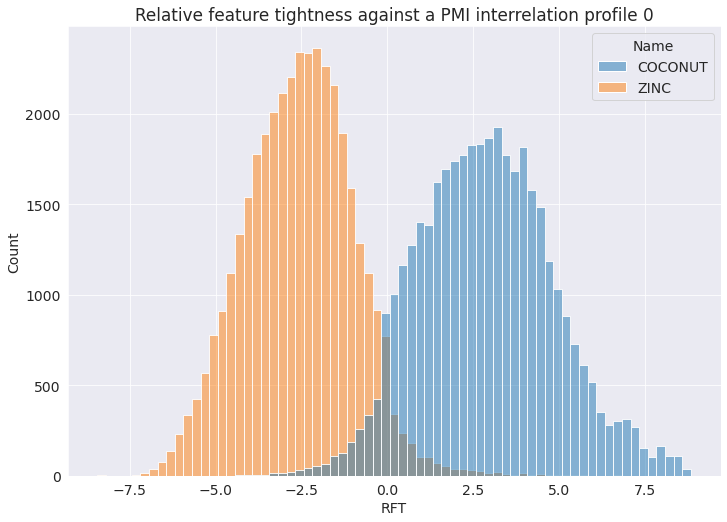

In [27]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 0')
plt.savefig(f"../images//joint_samples_RFT0F.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

### ROC CURVE

In [28]:
import numpy as np
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [46]:
plt.rcParams['font.size'] = '16'

In [30]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5...","([CH][CH2][CH2][C]([CH])=[O], [CH][CH2][C](=[O...",3.685689
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ...","([c][c]([CH2])[cH][c]([c])[c], [cH][cH][cH][cH...",4.238369
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28...","([c][c]([c])[O][CH3], [c][cH][cH][c]([c])[c], ...",5.050500
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65...","([CH2][C]([CH2])=[CH][CH]([CH])[O], [C][C](=[O...",3.643299
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ...","([cH][cH][cH][cH][cH], [c][CH2][CH2][NH][C], [...",0.918891
...,...,...,...,...,...,...,...,...,...,...
76527,Cc1ccc(Cl)cc1N1CCN(C(=O)CN(c2ccc(Cl)c(Cl)c2)S(...,551.060396,5.49932,UEZQAXBXQIVHHC-UHFFFAOYSA-N,UEZQAXBXQIVHHC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[24, 80, 165, 216, 231, 319, 350, 365, 366, 38...","([cH][cH][c]([cH][cH])[S]([N])(=[O])=[O], [CH2...",-5.247033
76528,COc1ccc(S(=O)(=O)N2CCC[C@H](C(=O)NCCCN3CCOCC3)...,425.198442,0.93440,SERMPMMEGHANCD-KRWDZBQOSA-N,SERMPMMEGHANCD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 93, 197, 221, 319, 322, 350, 374, 446, 52...","([CH2][CH2][CH]([CH2][N])[C]([NH])=[O], [cH][c...",-4.196066
76529,Cc1ccc(CN2C(=O)S/C(=C\c3cccn3-c3ccc(N(C)C)cc3)...,417.151098,5.08822,CPCJMIHIVOAJEG-JCMHNJIXSA-N,CPCJMIHIVOAJEG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 95, 233, 235, 273, 281, 310, 314, 475...","([cH][cH][c]([CH3])[cH][cH], [CH][c]([cH])[n](...",-4.182777
76530,CC(C)(C)C(=O)N1CC[C@H](Oc2cccc3cccnc23)C1,298.168128,3.26060,JTLGIMMFHQVTQX-AWEZNQCLSA-N,JTLGIMMFHQVTQX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 119, 145, 270, 378, 392, 448, 449, 524, ...","([cH][cH][c]([O][CH])[c]([c])[n], [CH3][C]([CH...",-1.557086


In [31]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
58590,CC(=S)S,91.975442,1.2635,ZEUUVJSRINKECZ-UHFFFAOYSA-N,ZEUUVJSRINKECZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[97, 110, 229, 713, 714, 807, 1017, 1057]",{},NaN


In [32]:
joint_samples = joint_samples[joint_samples['RFT'].notna()]

In [33]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT


In [34]:
fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')

In [35]:
roc_auc = metrics.auc(fpr, tpr)

In [36]:
roc_auc

0.9862556340580833

<Figure size 432x288 with 0 Axes>

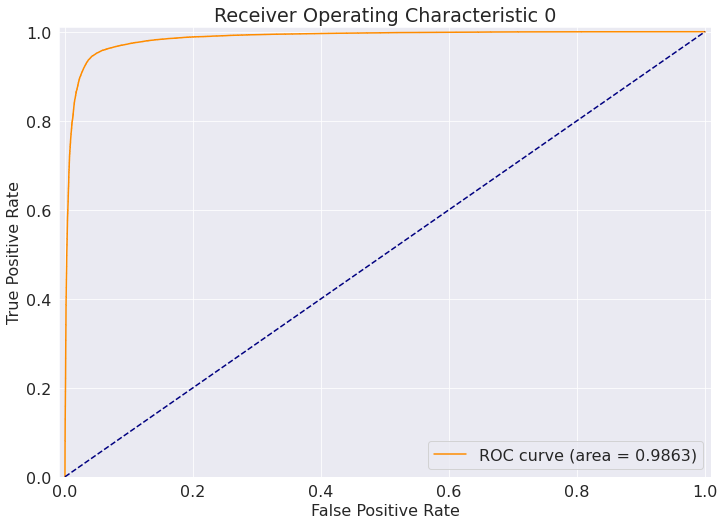

In [47]:
from matplotlib.pyplot import figure
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 0')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC0F.svg", format="svg")
plt.show()